In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
u_1=np.array([2,2])
u_2=np.array([-5,-3])


In [3]:
cov_1=np.array([[0.5,1],[1,1]])
cov_2=np.array([[1.5,2],[2,1]])


In [4]:
d1=np.random.multivariate_normal(u_1,cov_1,500)   # 0 class 
d2=np.random.multivariate_normal(u_2,cov_2,500)   # 1 class


C:\Users\HP\AppData\Local\Temp\ipykernel_10596\3608653764.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d1=np.random.multivariate_normal(u_1,cov_1,500)
C:\Users\HP\AppData\Local\Temp\ipykernel_10596\3608653764.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d2=np.random.multivariate_normal(u_2,cov_2,500)


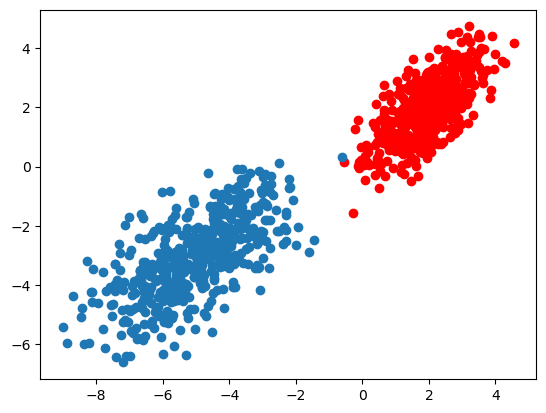

In [6]:
plt.scatter(d1[:,0], d1[:,1], color='red')
plt.scatter(d2[:,0], d2[:,1])


In [11]:
dataset =np.ones((1000,4))
dataset[:4]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [12]:
dataset[:500,1:3]=d1
dataset[500:,1:3]=d2


In [13]:
dataset[:500,3]=0
dataset[500:,3]=1


In [14]:
dataset[-4:]

array([[ 1.        , -6.32753394, -5.21111274,  1.        ],
       [ 1.        , -8.13933048, -4.22263454,  1.        ],
       [ 1.        , -7.03244651, -5.24834679,  1.        ],
       [ 1.        , -5.3866353 , -3.15248867,  1.        ]])

In [16]:
np.random.shuffle(dataset)

In [18]:
dataset[:4]

array([[ 1.        ,  2.19081722,  1.66981851,  0.        ],
       [ 1.        ,  1.63191915,  2.12900618,  0.        ],
       [ 1.        , -5.25890703, -2.10399037,  1.        ],
       [ 1.        ,  2.94867746,  4.20464895,  0.        ]])

In [19]:
x_train=dataset[:800,:-1]
x_test=dataset[800:,:-1]
y_train=dataset[:800,-1]
y_test=dataset[800:,-1]


In [27]:
y_train=np.reshape(-1,1)

(1,)

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [22]:
def hypothesis(X,theta):
    return 1/1+np.exp(np.dot(theta,X))

In [23]:
def cost(X,Y,theta):
    y_p=hypothesis(X,theta);
    loss=-1*(np.mean(Y*np.log(y_p)+(1-y)*np.log(1-y_p)))
    return loss


In [25]:
def gradient(X,Y,theta):
    y_p=hypothesis(X,theta)
    grad=X.T@(Y-y_p)
    

In [ ]:
def gradient_descent(X,Y,learning_rate=0.3,epochs=100):
    m,n=np.zeros((n,1))
    cost_epoch=[]
    for i in range(epochs):
        print("the algo is on epoch no: ",i,end='\r')
        loss=cost(X,Y,theta)
        grad=gradient(X,Y,theta)
        cost_epoch.append(loss)
        theta=theta+learning_rate*grad
        
    return theta,cost_epoch